In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir(r'C:\Users\sl456\Dropbox (HMS)\zKyunKyun_storage\cBioPortal\Metabric_2012Nature\python\ExpressionAnalysis_PIK3CAmNF1w_PIK3CAmNF1m')

In [3]:
# read csv file

# df_TumorID = pd.read_csv('TumorID_PIK3CAmAny_NF1.csv')
df_expression = pd.read_csv('data_expression.csv')

df_clinical = pd.read_csv('2509tumor_clinical_kyun.csv')
df_clinical.index = df_clinical['Sample ID']

In [4]:
df_TumorID = pd.read_csv('TumorID_PIK3CAm_allMAPKpathway.csv')

In [6]:
df_expression.index = df_expression['Hugo_Symbol']

In [7]:
df_exp = df_expression.T
df_exp['Sample ID'] = df_exp.index

In [95]:
# NF1wt_PIK3CAm and NF1m_PIK3CAm and OtherMut_PIK3CAm

WM_TumorID = df_TumorID.loc[df_TumorID['Group']=='WM']
MM_TumorID = df_TumorID.loc[df_TumorID['Group']=='MM']
OM_TumorID = df_TumorID.loc[df_TumorID['Group']=='OM']

In [96]:
NRAS_TumorID = df_TumorID.loc[df_TumorID['NRAS: MUT AMP GAIN;'].isin(['CNA: AMP;', 'CNA: GAIN;'])]

In [97]:
df_clinical

,Patient ID,Sample ID,Nottingham prognostic index,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Cohort,ER Status,ER status measured by IHC,...,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Cancer Studies,Sample Type,Tumor Other Histologic Subtype,Tumor Size,Tumor Stage,Type of Breast Surgery
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0002,MB-0002,MB-0002,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Living,r,YES,brca_metabric,Primary,IDC,10.0,1.0,BREAST CONSERVING
MB-0005,MB-0005,MB-0005,4.030,Breast Cancer,Breast Invasive Ductal Carcinoma,high,YES,1.0,+,pos,...,NaN,Died of Disease,r,NO,brca_metabric,Primary,IDC,15.0,2.0,MASTECTOMY
MB-0006,MB-0006,MB-0006,4.050,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,25.0,2.0,MASTECTOMY
MB-0010,MB-0010,MB-0010,4.062,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,31.0,4.0,MASTECTOMY
MB-0014,MB-0014,MB-0014,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,10.0,2.0,BREAST CONSERVING
MB-0020,MB-0020,MB-0020,6.130,Breast Cancer,Invasive Breast Carcinoma,high,YES,1.0,-,neg,...,ER-/HER2-,Died of Disease,l,YES,brca_metabric,Primary,ILC,65.0,3.0,MASTECTOMY
MB-0022,MB-0022,MB-0022,4.058,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,moderate,NO,1.0,+,pos,...,NaN,Died of Other Causes,l,YES,brca_metabric,Primary,IDC+ILC,29.0,2.0,BREAST CONSERVING
MB-0667,MB-0667,MB-0667,6.068,Breast Cancer,Invasive Breast Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,34.0,2.0,BREAST CONSERVING
MB-0028,MB-0028,MB-0028,5.032,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Other Causes,r,YES,brca_metabric,Primary,IDC,16.0,2.0,BREAST CONSERVING


In [98]:
MM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(MM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
WM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(WM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
OM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(OM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]

In [91]:
NRAS_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(NRAS_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]

In [133]:
Group1 = MM_TumorID_clinical['Sample ID']
Group2 = OM_TumorID_clinical['Sample ID']
Group3 = WM_TumorID_clinical['Sample ID']
len(Group1) + len(Group2) + len(Group3)

689

In [134]:
writer = pd.ExcelWriter('Group_TumorID.xlsx')

Group1.to_excel(writer, index=False, sheet_name='Group1_TumorID')
Group2.to_excel(writer, index=False, sheet_name='Group2_TumorID')
Group3.to_excel(writer, index=False, sheet_name='Group3_TumorID')

writer.save()

In [135]:
print(shape(NRAS_TumorID)) #PIK3CA_mut
print(shape(NRAS_TumorID_clinical)) #ER+ and PIK3CA_mut

(28, 14)
(23, 32)


In [136]:
MM_exp = df_exp.loc[df_exp['Sample ID'].isin(MM_TumorID_clinical['Sample ID'])]
WM_exp = df_exp.loc[df_exp['Sample ID'].isin(WM_TumorID_clinical['Sample ID'])]
OM_exp = df_exp.loc[df_exp['Sample ID'].isin(OM_TumorID_clinical['Sample ID'])]

In [44]:
OM_exp

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A,Sample ID
MB-0362,8.67698,6.07533,5.45393,4.99452,5.83827,6.3975,7.90622,5.25946,5.70238,6.93074,...,5.68032,7.68849,8.08498,5.1618,6.35322,4.83648,7.30464,5.25184,5.04959,MB-0362
MB-0574,8.81486,5.62874,5.47194,5.31652,5.84943,6.11687,9.20638,5.39658,5.43913,6.4301,...,5.63225,7.74456,8.31002,5.78006,6.42405,5.19315,6.90365,5.09193,5.22713,MB-0574
MB-0223,9.47054,6.20376,5.48712,5.2679,5.87708,5.87547,8.60737,5.5356,5.42384,6.38062,...,5.59738,7.8537,8.01517,6.57516,6.67818,5.20011,6.09842,5.28194,5.31531,MB-0223
MB-0497,9.27137,5.86227,5.52873,5.38424,6.26786,6.9153,8.2475,5.30415,5.3998,5.72541,...,5.27928,7.73913,7.94151,5.43123,5.99623,5.07124,6.05949,5.46471,4.95892,MB-0497
MB-0143,8.45624,6.38223,5.22344,5.49825,5.99289,5.45834,8.42478,5.25455,5.81568,6.86629,...,5.30438,7.78757,9.00557,7.33131,6.27739,5.25081,8.02647,5.41571,5.2888,MB-0143
MB-0443,8.90913,6.35601,5.35056,5.26552,6.3114,6.96469,8.34098,5.20275,5.5298,6.31667,...,5.26166,7.61051,7.6333,5.24554,6.17582,5.187,5.91595,5.1012,5.11631,MB-0443
MB-0322,8.5772,5.61243,5.35966,5.17116,6.06374,5.70172,8.77715,5.30524,5.63356,6.45431,...,5.37866,7.68522,8.48714,5.4095,6.43804,5.29459,7.38877,5.48758,5.18887,MB-0322
MB-0138,9.47331,6.16739,5.36676,5.13943,5.62007,6.36218,8.5229,5.2179,5.45099,5.8526,...,5.38314,7.18763,8.42202,5.40069,6.68596,5.23558,7.65694,5.31723,5.33689,MB-0138
MB-0579,9.37536,7.4162,5.39299,5.30027,5.7672,5.63916,8.15665,5.38062,5.54756,6.90097,...,5.51044,7.07729,8.2554,5.14284,6.53463,5.41956,7.47053,5.35827,5.08828,MB-0579
MB-0272,8.54255,5.97234,5.39426,5.28969,5.76563,5.86578,7.97728,5.3805,5.58714,6.59089,...,5.59646,7.77784,8.31567,5.23552,6.38364,5.28304,6.99804,5.42304,5.27598,MB-0272


In [45]:
print('PIK3CA-mut')
print(shape(MM_TumorID))
print(shape(WM_TumorID))
print(shape(OM_TumorID)); print()

print('ER+ and PIK3CA-mut')
print(shape(MM_TumorID_clinical))
print(shape(WM_TumorID_clinical))
print(shape(OM_TumorID_clinical)); print()

print(shape(MM_exp))
print(shape(WM_exp))
print(shape(OM_exp))

PIK3CA-mut
(225, 14)
(475, 14)
(275, 14)

ER+ and PIK3CA-mut
(155, 32)
(326, 32)
(208, 32)

(155, 24369)
(326, 24369)
(208, 24369)


In [46]:
MM_exp['Group'] = 'MM'
WM_exp['Group'] = 'WM'
OM_exp['Group'] = 'OM'

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [47]:
DF1 = pd.concat([MM_exp, WM_exp, OM_exp], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [48]:
DF1.columns

Index(['RERE', 'RNF165', 'CD049690', 'BC033982', 'PHF7', 'CIDEA', 'PAPD4',
       'AI082173', 'SLC17A3', 'SDS',
       ...
       'UGCGL1', 'VPS72', 'CSMD3', 'CC2D1A', 'CB986545', 'IGSF9', 'DA110839',
       'FAM71A', 'Sample ID', 'Group'],
      dtype='object', name='Hugo_Symbol', length=24370)

In [49]:
DF2 = DF1.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [50]:
DF2['Sample ID'] = DF1['Sample ID']
DF2['Group'] = DF1['Group']

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# PCA

In [51]:
# Separating out the features
x = DF2.iloc[:, :-2].values

In [52]:
x

array([[9.053967126, 6.093466502999999, 5.251529283, ..., 5.239323608,
        7.417764568, 5.38635653],
       [7.9631410229999995, 6.458806801000001, 5.497223539, ...,
        5.28053665, 8.079921323999999, 5.382906074],
       [8.20291136, 5.566712572, 5.453995695, ..., 5.363779561,
        7.149769657999999, 5.177913232],
       ..., 
       [8.616536678, 6.946619509, 5.095887783, ..., 5.406827742999999,
        7.38520847, 5.488525094],
       [9.511670794, 7.674680759, 5.5714983579999995, ...,
        5.508123467000001, 6.415230912999999, 5.294653873],
       [8.892469176, 6.34666586, 5.415783145, ..., 5.283810652,
        7.099822806000001, 5.207231284]], dtype=object)

In [53]:
# Separating out the target
y = DF2.loc[:,['Sample ID']].values

# Standardizing the features
#x = StandardScaler().fit_transform(x)
x=x

In [54]:
x

array([[9.053967126, 6.093466502999999, 5.251529283, ..., 5.239323608,
        7.417764568, 5.38635653],
       [7.9631410229999995, 6.458806801000001, 5.497223539, ...,
        5.28053665, 8.079921323999999, 5.382906074],
       [8.20291136, 5.566712572, 5.453995695, ..., 5.363779561,
        7.149769657999999, 5.177913232],
       ..., 
       [8.616536678, 6.946619509, 5.095887783, ..., 5.406827742999999,
        7.38520847, 5.488525094],
       [9.511670794, 7.674680759, 5.5714983579999995, ...,
        5.508123467000001, 6.415230912999999, 5.294653873],
       [8.892469176, 6.34666586, 5.415783145, ..., 5.283810652,
        7.099822806000001, 5.207231284]], dtype=object)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

In [56]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 
                          'PC3', 'PC4', 
                          'PC5', 'PC6', 
                          'PC7', 'PC8', 
                          'PC9', 'PC10' ])

principalDf.index = DF2.index

In [57]:
finalDf = pd.concat([principalDf, DF2['Group']], axis = 1)

eigenvalues = pca.explained_variance_

In [58]:
eigenvalues

array([ 417.36599156,  232.12270952,  195.4859264 ,  134.95914354,
        113.21702771,   93.77396745,   70.25630654,   61.99828977,
         53.66215141,   48.21133715])

In [59]:
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Group
MB-0891,-18.504628,-17.191958,-8.822195,3.552718,-1.094428,-5.686547,-3.904459,5.161085,3.278153,3.122448,MM
MB-0434,4.876489,24.423814,10.630134,-23.070117,-11.381620,14.002831,-14.883007,10.700936,-3.497103,4.399912,MM
MB-0666,-1.014085,18.908225,19.671442,-5.981200,-2.595164,13.889523,-10.633810,-2.881001,-6.777229,4.880346,MM
MB-0598,-14.417393,9.712549,16.963027,-3.648680,-7.364932,-2.022388,-16.459350,7.713161,-4.370840,1.125612,MM
MB-0382,-15.356508,-16.608127,-2.104785,-2.986730,-0.030105,-2.220371,-6.417534,-6.637254,6.074748,6.004236,MM
MB-0215,-23.906573,10.926790,3.920842,3.089495,0.730131,-12.330151,-6.537697,-5.024993,-7.842704,8.073504,MM
MB-0306,-23.048310,7.715378,10.625164,-0.923325,9.043673,2.085775,-17.669236,-7.234896,-8.191964,-1.876744,MM
MB-0363,-13.100507,6.346082,22.868485,-11.618099,23.615672,-1.597696,6.891065,-14.218590,3.870118,0.805479,MM
MB-0379,-14.239273,-10.695404,6.124930,-12.394680,-10.637391,-11.630612,-2.968618,-4.563550,1.430582,-3.119415,MM
MB-0624,-25.108256,-25.334483,-8.584550,-12.130705,6.384076,0.852501,0.026180,-0.396837,9.174499,-6.447238,MM


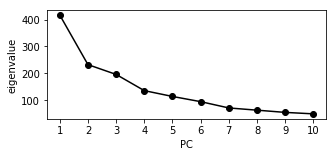

In [60]:
# eigenvalue
fig = plt.figure(figsize = (5,2))
ax = fig.add_subplot(1,1,1) 

ax.plot(range(1,11), eigenvalues, marker='o', c='k')

plt.ylabel('eigenvalue')
plt.xlabel('PC')
#plt.ylim([0, 3.5])
#plt.xlim([])
plt.xticks(np.arange(1, 11, 1))

plt.show()

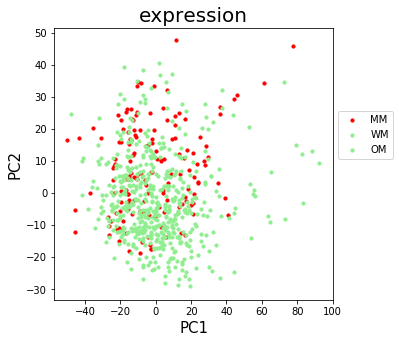

In [61]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 

targets = ['MM', 'WM', 'OM']
colors = ['red', 'lightgreen', 'lightgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 10)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('expression', fontsize = 20)
#ax.grid()
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)

plt.show()

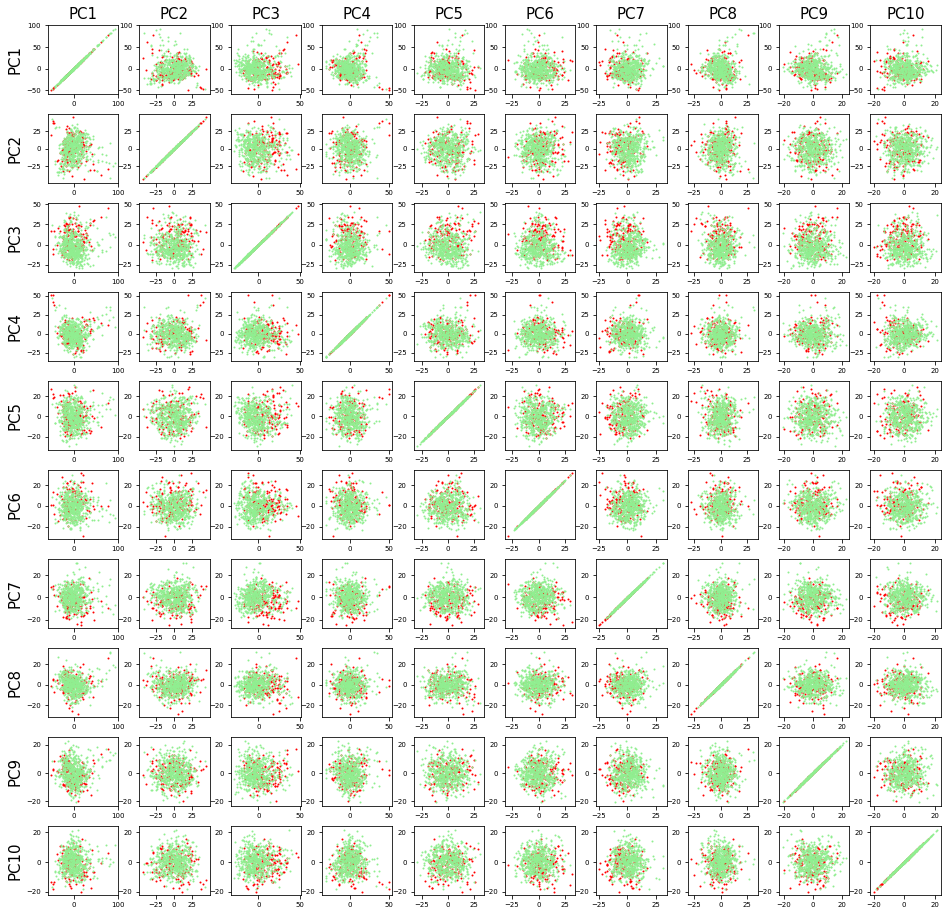

In [62]:
PClist = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10' ]

fig = plt.figure(figsize = (16,16))

for num1, PCnum1 in enumerate(PClist):
    for num2, PCnum2 in enumerate(PClist):
          
        ax = fig.add_subplot(10,10,num2+1+10*num1) 

        targets = ['MM', 'WM', 'OM']
        colors = ['red', 'lightgreen', 'lightgreen']
        for target, color in zip(targets,colors):
            indicesToKeep = finalDf['Group'] == target
            ax.scatter(finalDf.loc[indicesToKeep, PCnum2]
                       , finalDf.loc[indicesToKeep, PCnum1]
                       , c = color
                       , s=1)
            ax.tick_params(labelsize=7)



            if num1+1 ==1:
                ax.set_title(PCnum2, fontsize = 15)

            if num2+1 == 1:
                ax.set_ylabel(PCnum1, fontsize = 15)

        subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.3, hspace=0.3)

        #ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
        #ax.set_xlabel(PCnum1, fontsize = 15)
        #ax.set_ylabel(PCnum2, fontsize = 15)
        #ax.set_title('expression', fontsize = 20)
        #ax.grid()
        #ax.set_xlim(-100, 100)
        #ax.set_ylim(-100, 100)

plt.show()

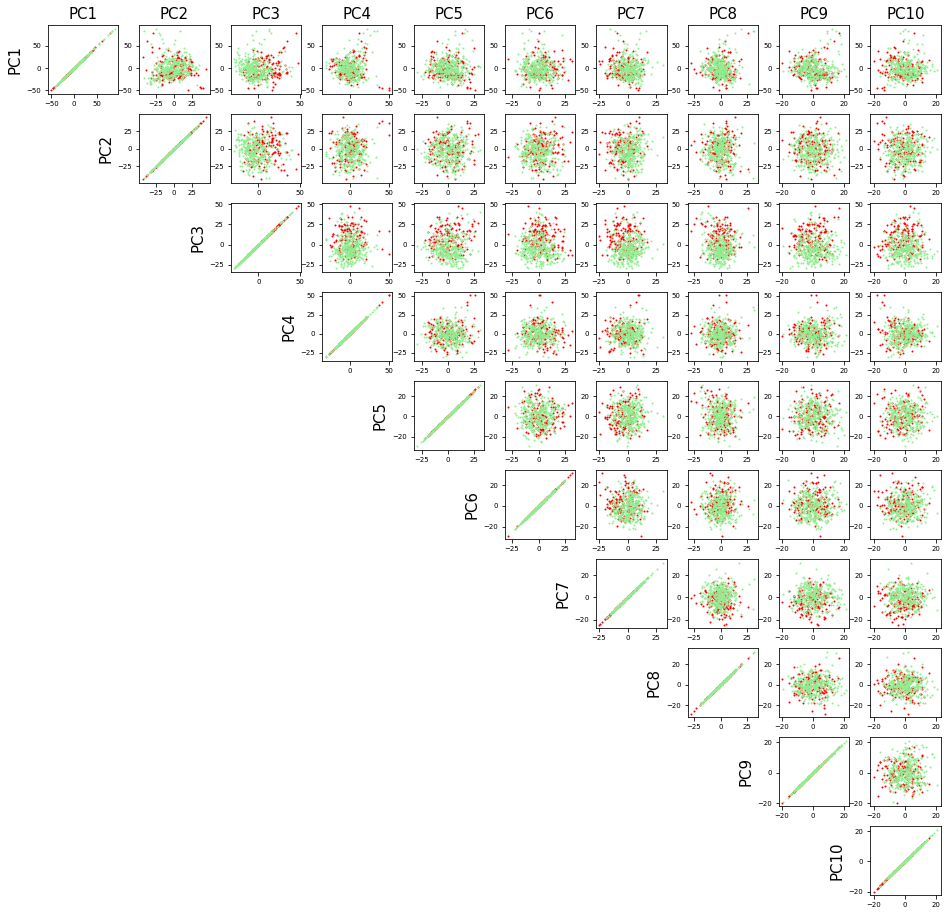

In [63]:
PClist = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10' ]

fig = plt.figure(figsize = (16,16))

for num1, PCnum1 in enumerate(PClist):
    for num2, PCnum2 in enumerate(PClist):

        
        
        if num2 >= num1:
            
            ax = fig.add_subplot(10,10,num2+1+10*num1) 

            targets = ['MM', 'WM']
            colors = ['red', 'lightgreen']
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf['Group'] == target
                ax.scatter(finalDf.loc[indicesToKeep, PCnum2]
                           , finalDf.loc[indicesToKeep, PCnum1]
                           , c = color
                           , s=1)
                ax.tick_params(labelsize=7)



                if num1+1 ==1:
                    ax.set_title(PCnum2, fontsize = 15)

                if num2 == num1:
                    ax.set_ylabel(PCnum1, fontsize = 15)

            subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.3, hspace=0.3)

            #ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
            #ax.set_xlabel(PCnum1, fontsize = 15)
            #ax.set_ylabel(PCnum2, fontsize = 15)
            #ax.set_title('expression', fontsize = 20)
            #ax.grid()
            #ax.set_xlim(-100, 100)
            #ax.set_ylim(-100, 100)

plt.show()

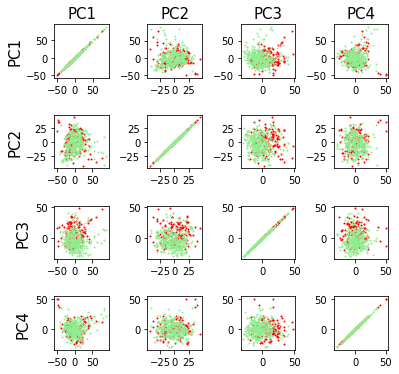

In [66]:

fig = plt.figure(figsize = (16,16))

for num1, PCnum1 in enumerate(PClist[0:4]):
    for num2, PCnum2 in enumerate(PClist[0:4]):

        
        
        #if num2 >= num1:
            
        ax = fig.add_subplot(10,10,num2+1+10*num1) 

        targets = ['MM', 'WM']
        colors = ['red', 'lightgreen']
        for target, color in zip(targets,colors):
            indicesToKeep = finalDf['Group'] == target
            ax.scatter(finalDf.loc[indicesToKeep, PCnum2]
                       , finalDf.loc[indicesToKeep, PCnum1]
                       , c = color
                       , s=1)
            ax.tick_params(labelsize=10)



            if num1+1 ==1:
                ax.set_title(PCnum2, fontsize = 15)

            if num2+1 == 1:
                ax.set_ylabel(PCnum1, fontsize = 15)

        subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.7, hspace=0.7)

            #ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
            #ax.set_xlabel(PCnum1, fontsize = 15)
            #ax.set_ylabel(PCnum2, fontsize = 15)
            #ax.set_title('expression', fontsize = 20)
            #ax.grid()
            #ax.set_xlim(-100, 100)
            #ax.set_ylim(-100, 100)

plt.show()

In [67]:
pca.components_

array([[  6.73127118e-03,   1.13392814e-02,   2.10010768e-04, ...,
          7.68541349e-04,   6.06974274e-03,  -3.94531759e-04],
       [ -1.24875440e-02,  -1.32420500e-02,   1.94373183e-04, ...,
         -6.44884508e-04,   1.89126727e-03,   4.58853152e-04],
       [ -1.38109636e-02,  -1.42691842e-03,   3.10370217e-05, ...,
         -5.61564463e-04,  -3.84081416e-03,   1.35834270e-04],
       ..., 
       [ -1.70750424e-02,  -6.43591760e-03,   2.35381175e-04, ...,
          9.76359746e-04,  -1.41772263e-02,   7.34874945e-04],
       [ -1.13841475e-02,  -4.02691923e-03,   9.20999578e-04, ...,
          3.36682608e-04,   2.73852443e-03,   1.17680601e-03],
       [  9.57046667e-03,   1.01350104e-03,  -6.83754745e-04, ...,
         -8.07859632e-05,   5.72468346e-03,  -1.76320642e-03]])

In [68]:
# PC components relations with features:

PC_features_rel = pd.DataFrame(pca.components_,columns=DF2.columns[:-2])

In [69]:
PC_features_rel

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839
0,0.006731,0.011339,0.000210,0.000905,0.008021,-0.016102,-0.006651,0.001449,0.001960,0.002657,...,0.000491,0.003110,-0.000743,0.015920,-0.000526,0.000435,0.005988,0.000769,0.006070,-0.000395
1,-0.012488,-0.013242,0.000194,-0.000566,-0.001569,-0.035875,0.002986,-0.000367,-0.000816,0.004887,...,-0.000168,0.000224,0.001143,-0.004293,0.005986,0.000913,-0.000555,-0.000645,0.001891,0.000459
2,-0.013811,-0.001427,0.000031,-0.000451,-0.006566,-0.006523,-0.010005,0.000666,0.000850,0.017083,...,-0.000222,0.000479,0.000288,0.005211,-0.003009,0.002653,-0.000405,-0.000562,-0.003841,0.000136
3,-0.003680,-0.001173,0.000018,-0.000546,0.003219,0.007800,-0.003466,0.000200,-0.000556,0.000345,...,-0.000810,-0.000161,0.000727,0.005894,-0.005957,-0.002570,0.002812,0.000584,-0.005178,0.001228
4,0.007925,0.004593,-0.000725,0.001256,0.005306,0.022786,0.002031,-0.000477,-0.000634,-0.005107,...,-0.000780,0.001286,0.000707,0.001489,-0.005588,-0.000894,0.001900,0.000358,-0.012988,-0.000043
5,0.006805,0.018574,-0.000298,0.000007,-0.003184,0.002811,0.000355,-0.000208,0.000511,-0.017741,...,0.000329,0.002667,-0.000506,-0.002197,-0.000087,0.002467,0.002285,0.000042,0.015558,0.000270
6,0.009829,0.017492,0.000746,0.000055,0.002794,0.023157,0.006414,-0.000723,0.000715,-0.002763,...,0.000032,-0.003893,-0.000840,-0.005114,-0.007437,0.006243,-0.002508,0.000116,-0.017631,0.000507
7,-0.017075,-0.006436,0.000235,0.000050,0.002925,0.039162,-0.018006,0.000901,0.000648,0.006407,...,-0.001463,0.004687,0.000520,0.002993,-0.002463,0.002258,0.005762,0.000976,-0.014177,0.000735
8,-0.011384,-0.004027,0.000921,-0.000605,0.007317,-0.014628,-0.010973,-0.001041,0.001712,-0.002492,...,-0.000548,0.001246,-0.000539,-0.003177,0.008409,-0.005713,-0.004341,0.000337,0.002739,0.001177
9,0.009570,0.001014,-0.000684,-0.001741,-0.002071,-0.014432,-0.011683,-0.000521,-0.001299,-0.006542,...,-0.000732,0.000886,0.002073,-0.006157,0.009572,-0.000381,0.010766,-0.000081,0.005725,-0.001763


In [70]:
# Select PC you are interested (by row number)

DF_rel = PC_features_rel.iloc[2,:]

DF_s = DF_rel.sort_values()

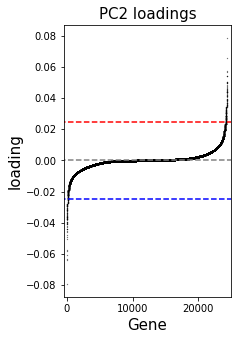

In [71]:
cutoff = 0.025
a = pd.DataFrame(DF_s[DF_s < -cutoff].index)
b = pd.DataFrame(DF_s[DF_s > cutoff].index)

plt.figure(figsize=(3,5))

plt.scatter(range(len(DF_s)), DF_s, s=0.05, c='k')

plt.plot([-1000,26000],[cutoff, cutoff],  c='r', linestyle='--')
plt.plot([-1000,26000],[-cutoff, -cutoff],  c='b', linestyle='--')
plt.plot([-1000,26000],[0,0], c='grey', linestyle='--')

xlim(-500,25000)
xlabel('Gene', fontsize=15)
ylabel('loading', fontsize=15)
plt.title('PC2 loadings', fontsize=15)
plt.show()

In [72]:
print(len(a))
print(len(b))

97
177


In [73]:
a.to_csv('negList_PC3_ERpos.csv')
b.to_csv('posList_PC3_ERpos.csv')

In [74]:
list(DF_s[DF_s <-cutoff].index)

['PIP',
 'CYP4X1',
 'STC2',
 'NAT1',
 'SCUBE2',
 'LTF',
 'CAPN8',
 'AZGP1',
 'CYP4Z1',
 'PSD3',
 'SERPINA11',
 'HMGCS2',
 'CLIC6',
 'SCGB3A1',
 'CYBRD1',
 'ANKRD30A',
 'UGT2B11',
 'BMPR1B',
 'NOSTRIN',
 'DNAJC12',
 'LOC389033',
 'RTN1',
 'AGR3',
 'MAPT',
 'FCGBP',
 'GRIA2',
 'BNIPL',
 'SLC39A6',
 'C1orf64',
 'LOC338579',
 'NTN4',
 'CGNL1',
 'MUC1',
 'UGT2B7',
 'PTPRT',
 'TFF1',
 'IRX2',
 'LRP2',
 'KIF13B',
 'GJA1',
 'TCN1',
 'SORBS2',
 'SCGB1D2',
 'KIAA0531',
 'AGTR1',
 'IL6ST',
 'PDZK1',
 'SUSD3',
 'TMEM26',
 'SEC14L2',
 'ZG16B',
 'REEP6',
 'PLAT',
 'GP2',
 'ENPP5',
 'GLRB',
 'ANG',
 'PKIB',
 'CHAD',
 'CX3CR1',
 'STK32B',
 'GSTT1',
 'REEP1',
 'UGT2B28',
 'PPP1R3C',
 'GPC4',
 'SERPINA3',
 'C9orf152',
 'MYBPC1',
 'NFIX',
 'TMEM101',
 'GAD1',
 'FAM129A',
 'ZNF385B',
 'CITED4',
 'LYPD6',
 'FGD3',
 'ATP1B1',
 'WLS',
 'HSPA2',
 'QDPR',
 'DACH1',
 'PMP22',
 'TGFBR3',
 'EPHX2',
 'RERG',
 'CRIM1',
 'C14orf45',
 'ESR1',
 'DCDC5',
 'VTCN1',
 'ADCY1',
 'RABEP1',
 'TBC1D9',
 'MLPH',
 'GRP',
 'APP'

# Heatmap

In [75]:
DF3 = DF2[list(DF_s[DF_s < -cutoff].index)+list(DF_s[DF_s > cutoff].index)+['Sample ID', 'Group']]

In [76]:
DF3

Hugo_Symbol,PIP,CYP4X1,STC2,NAT1,SCUBE2,LTF,CAPN8,AZGP1,CYP4Z1,PSD3,...,UBE2C,STAT1,CD3D,LTB,CCL5,DKFZp686O16217,CXCL10,CXCL9,Sample ID,Group
MB-0891,13.0548,11.5034,11.3811,10.8763,9.09609,10.8251,8.34322,11.3334,11.3061,8.5722,...,7.30187,8.75639,7.90441,7.5994,10.0881,9.24724,8.25476,8.18633,MB-0891,MM
MB-0434,10.4128,8.8033,7.48649,11.1965,9.37024,8.50476,8.79738,10.728,10.9987,9.10104,...,10.0867,9.3351,6.77592,6.53582,8.16032,7.35333,8.54289,8.31792,MB-0434,MM
MB-0666,9.01456,9.93415,7.97126,10.2056,6.36482,6.93945,6.79134,10.8934,9.27464,7.93331,...,9.46284,11.4912,8.40113,7.70835,10.3387,7.08988,10.6465,9.29653,MB-0666,MM
MB-0598,13.6332,9.1199,7.46939,9.42038,8.53795,7.72002,8.39119,9.12064,8.61024,8.114,...,10.3971,10.3416,8.25582,7.89856,9.58011,8.03432,10.1135,8.25368,MB-0598,MM
MB-0382,12.8427,10.137,10.9499,9.68733,8.4559,10.618,8.88479,10.3969,11.1734,8.3003,...,6.42498,10.5061,8.98699,8.50243,10.4994,10.2116,10.1903,9.83131,MB-0382,MM
MB-0215,9.49215,10.8394,11.9609,10.58,9.47025,10.6813,9.92391,9.77778,9.82552,8.61693,...,9.29469,11.3083,8.13932,7.68756,9.97563,9.96884,10.3519,8.98962,MB-0215,MM
MB-0306,13.1839,10.8277,9.27096,10.2348,8.37502,13.2399,7.31703,10.3231,10.647,7.36182,...,8.76458,11.9409,9.23653,8.67115,11.0352,9.8094,11.0509,10.7759,MB-0306,MM
MB-0363,8.0413,8.88557,5.91142,9.98874,10.6421,7.02295,8.24688,9.1947,7.0827,6.87743,...,10.3152,11.9444,10.6559,10.1669,11.7572,11.9217,10.956,12.1135,MB-0363,MM
MB-0379,6.59726,7.81707,9.74321,9.64833,9.42766,5.48809,8.67745,8.25473,6.61011,7.57568,...,8.36428,10.5693,8.60946,7.64226,10.5556,7.87939,10.2239,8.21207,MB-0379,MM
MB-0624,14.3956,11.9978,11.41,10.2585,9.88904,10.8053,7.56542,10.4085,12.0516,7.80943,...,6.12221,8.8742,8.28248,7.76126,10.5566,12.3296,7.87093,7.47702,MB-0624,MM


In [80]:
# APscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(DF3['Group'].unique(), ['green', 'yellow', 'orange']))
#Cell2 = dict(zip(DF3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = DF3['Group'].map(Cell)
#row_colors2 = DF3['Treatment'].map(Cell2)

In [81]:
df = DF3.iloc[:,:-2].astype(float)
df_norm_col=(df-df.mean())/df.std()

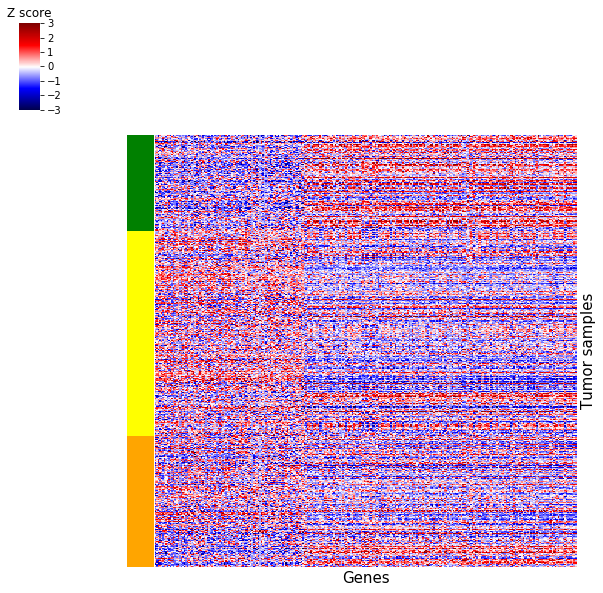

In [82]:
g = sns.clustermap(df_norm_col, row_colors=[row_colors], cmap="seismic" ,vmin=-3, vmax=3, 
                   row_cluster=False ,col_cluster=False,)
                  #figsize=(16,16))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0,)

ax = g.ax_heatmap
ax.set_xlabel("Genes", fontsize=15)
ax.set_ylabel("Tumor samples", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Z score')

plt.show()

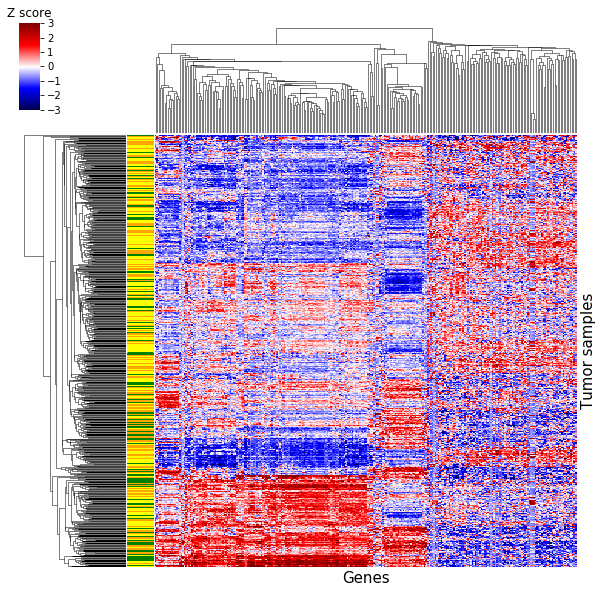

In [83]:
g = sns.clustermap(df_norm_col, row_colors=[row_colors], cmap="seismic" ,vmin=-3, vmax=3, 
                   row_cluster=True ,col_cluster=True,)
                  #figsize=(16,16))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0,)

ax = g.ax_heatmap
ax.set_xlabel("Genes", fontsize=15)
ax.set_ylabel("Tumor samples", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Z score')

plt.show()

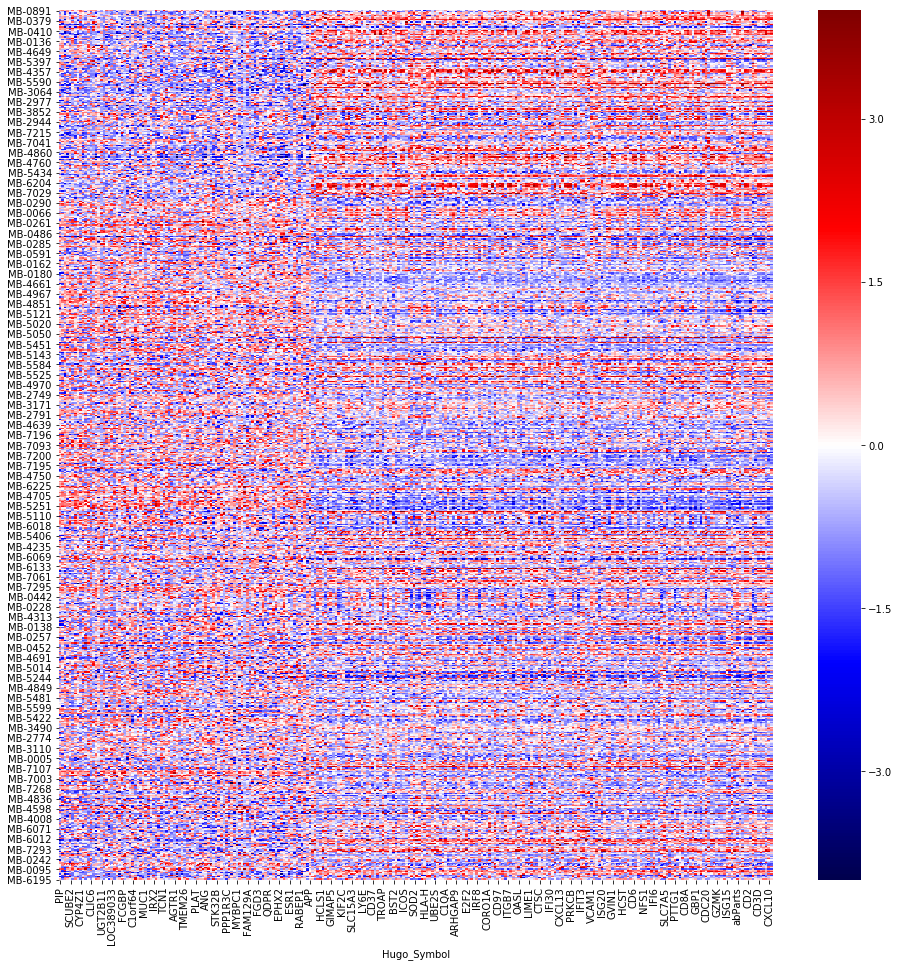

In [84]:
plt.figure(figsize=(16,16))

df_norm_col=(df-df.mean())/df.std()
sns.heatmap(df_norm_col, cmap='seismic',vmin=-4, vmax=4)


plt.show()